# Competi Kaggle: ¿Qué dices colega?

## 1. Carga datos & procesado imágenes

In [1]:
import numpy as np
import pandas as pd 
import os
import matplotlib.pyplot as plt
from skimage.io import imread
import cv2
import random

import tensorflow as tf
from tensorflow import keras

from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img

In [2]:
train_path = '/Users/cris/Repositorios/local_docs/curso_ds21/movida/train/'
test_path = '/Users/cris/Repositorios/local_docs/curso_ds21/movida/test/'
target_df = pd.read_csv('/Users/cris/Repositorios/local_docs/curso_ds21/movida/file_target.csv')

In [3]:
labels_target = target_df['target'].unique()

In [4]:
labels_int = pd.DataFrame({'target':labels_target,
                           'target_int':0})

In [5]:
for i in range(len(labels_target)):
    labels_int['target_int'][i]=i

<ipython-input-5-0d4d09667d7e>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  labels_int['target_int'][i]=i


In [6]:
final_target = target_df.copy()

In [7]:
final_target = final_target.merge(labels_int, left_on='target', right_on='target')

In [8]:
target_int = final_target.copy()

In [9]:
target_int.drop(columns='target', inplace=True)

In [10]:
target_int = target_int.astype('str')

In [114]:
imagenes = []
filenames = os.listdir(train_path)

for img in os.listdir(train_path):
    image = imread(train_path + img)
    img_gray = cv2.imread(img, cv2.IMREAD_GRAYSCALE)
    smallimage = cv2.resize(img_gray, (50, 50))
    smallimage = smallimage / 255.
    imagenes.append(smallimage)

In [ ]:
for i in imagenes:
    img_gray = cv2.imread(imag, cv2.IMREAD_GRAYSCALE)

In [120]:
type(imagenes[1])

numpy.ndarray

In [126]:
imag = filenames[1]

In [127]:
img_gray = cv2.imread(imag, cv2.IMREAD_GRAYSCALE)

In [133]:
type(img_gray)

NoneType

In [121]:
image = imread(train_path + filenames[1])

In [ ]:
imag

In [122]:
image

array([[[  0,   9, 243],
        [  0,   9, 255],
        [  0,   0, 253],
        ...,
        [  1,   0, 253],
        [  0,   0, 252],
        [  0,   6, 255]],

       [[  0,   7, 255],
        [  0,   0, 229],
        [ 18,  12, 210],
        ...,
        [ 11,   3, 176],
        [ 13,   9, 207],
        [  0,   1, 232]],

       [[  0,   0, 254],
        [  9,   5, 203],
        [ 83,  77, 165],
        ...,
        [139, 135, 162],
        [132, 127, 229],
        [  7,   3, 202]],

       ...,

       [[  6,   0, 253],
        [  8,   8, 194],
        [152, 171, 229],
        ...,
        [134, 122, 110],
        [125, 115, 184],
        [ 12,   4, 188]],

       [[  7,   1, 255],
        [  0,   2, 211],
        [150, 164, 255],
        ...,
        [130, 119, 188],
        [116, 111, 227],
        [  9,   6, 197]],

       [[  0,   0, 253],
        [  0,   6, 242],
        [  0,   8, 211],
        ...,
        [ 11,   5, 189],
        [  6,   7, 196],
        [  1,   6, 219]]

In [90]:
filenames = pd.DataFrame({'archivo':filenames})

In [91]:
file = filenames.merge(target_int, left_on='archivo', right_on='archivo')

In [92]:
X_train = np.array(imagenes)

In [23]:
X_train.shape

(9000, 75, 75, 3)

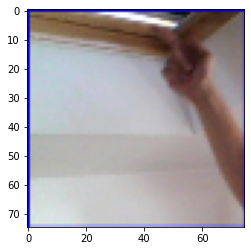

In [16]:
plt.imshow(X_train[0])

In [17]:
y_train = file['target_int']

In [18]:
y_train = np.array(y_train).astype('int')

In [19]:
y_train.shape

(9000,)

In [28]:
len(np.unique(y_train))

29

In [ ]:
y_prueba = file['target_int'].copy()

In [ ]:
y_prueba = keras.utils.to_categorical(np.asarray(y_prueba.factorize()[0]))

In [ ]:
y_prueba[1]

In [ ]:
file2 = filenames.merge(target_df, left_on='archivo', right_on='archivo')

In [ ]:
y_prueba2 = file['target_int'].copy()

In [ ]:
file2.drop(columns='archivo',inplace=True)

In [ ]:
y_prueba2 = pd.get_dummies(file2)

In [ ]:
y_prueba2.shape

In [ ]:
y_prueba2

## 2. Modelo

In [34]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dropout
from tensorflow.keras.layers import Flatten, Dense, Activation, BatchNormalization

model = Sequential()

model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(75, 75, 3)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))
model.add(Dense(29, activation='softmax'))

In [35]:
model.compile(optimizer="rmsprop",
              loss='sparse_categorical_crossentropy',
              metrics=['acc'])

In [36]:
model.fit(X_train, y_train, epochs=10,
          batch_size=64, validation_split=.2)

Epoch 1/10
113/113 [==============================] - 12s 105ms/step - loss: 3.7017 - acc: 0.1539 - val_loss: nan - val_acc: 0.0306
Epoch 2/10
113/113 [==============================] - 12s 107ms/step - loss: 2.0889 - acc: 0.4112 - val_loss: nan - val_acc: 0.0306
Epoch 3/10
113/113 [==============================] - 12s 103ms/step - loss: 1.4726 - acc: 0.5484 - val_loss: 125091548846433687441641259925504.0000 - val_acc: 0.0400
Epoch 4/10
113/113 [==============================] - 12s 103ms/step - loss: 1.0226 - acc: 0.6768 - val_loss: nan - val_acc: 0.0989
Epoch 5/10
113/113 [==============================] - 12s 103ms/step - loss: 0.7566 - acc: 0.7706 - val_loss: nan - val_acc: 0.3183
Epoch 6/10
113/113 [==============================] - 12s 105ms/step - loss: 0.5661 - acc: 0.8240 - val_loss: nan - val_acc: 0.5667
Epoch 7/10
113/113 [==============================] - 12s 104ms/step - loss: 0.4563 - acc: 0.8570 - val_loss: 20836046854150746771537342234624.0000 - val_acc: 0.7428
Epoch 8

## 2.2 Otro modelo

In [ ]:
from sklearn.model_selection import train_test_split

train_df, validate_df = train_test_split(target_df,
                                         test_size=0.20,
                                         random_state=42)

In [ ]:
# Parámetros ImageDataGenerator
train_datagen = ImageDataGenerator(rescale = 1./255.)
validation_datagen = ImageDataGenerator(rescale = 1.0/255.)

In [ ]:
# Flow training images in batches of 20 using train_datagen generator
train_generator = train_datagen.flow_from_dataframe(train_df,
                                                    train_path,
                                                    x_col='archivo',
                                                    y_col='target',
                                                    batch_size=32,
                                                    class_mode='categorical',
                                                    target_size=(50, 50),
                                                    color_mode='grayscale')

# Flow training images in batches of 20 using train_datagen generator
validation_generator = validation_datagen.flow_from_dataframe(validate_df,
                                                    train_path,
                                                    x_col='archivo',
                                                    y_col='target',
                                                    batch_size=32,
                                                    class_mode='categorical',
                                                    target_size=(50, 50),
                                                    color_mode='grayscale')

In [ ]:
from tensorflow.keras.applications.vgg16 import VGG16

base_model = VGG16(input_shape=(50, 50, 3),
                   include_top=False,
                   weights='imagenet')

for layer in base_model.layers:
    layer.trainable = False

# Podemos acceder a cada layer.    

##### FULLY CONNECTED LAYER #####
# Flatten the output layer to 1 dimension
x = Flatten()(base_model.output)

# Add a fully connected layer with 512 hidden units and ReLU activation
x = Dense(512, activation='relu')(x)

# Add a dropout rate of 0.5
x = Dropout(0.5)(x)

# Add a final sigmoid layer for classification
x = Dense(1, activation='sigmoid')(x)

model = tf.keras.models.Model(base_model.input, x)

In [ ]:
model.fit(train_generator,
          epochs=5,
          batch_size=20)

## 3. Predicción y test

In [41]:
imagenes_test = []
filenames_test = os.listdir(test_path)

for img in os.listdir(test_path):
    image = imread(test_path + img)
    smallimage = cv2.resize(image, (75, 75))
    smallimage = smallimage / 255.
    imagenes_test.append(smallimage)

In [42]:
X_test = np.array(imagenes_test)

In [43]:
X_test.shape

(1150, 75, 75, 3)

In [54]:
predictions = model.predict(X_test)

In [55]:
predictions.shape

(1150, 29)

## 4. Exportación sample

In [75]:
max_val = []

for i in range(len(predictions)):
    val = np.argmax(predictions[i])
    max_val.append(val)

In [81]:
true_values = []

for i in max_val:
    for v in labels_int['target_int']:
        if i == v:
            true_values.append(labels_int['target'][v])

In [85]:
df_submission = pd.DataFrame({'archivo': filenames_test,
                            'target':true_values})

In [88]:
df_submission.to_csv('submission_1.csv', index=False)